#📌 Extracción

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
import json
from pandas import json_normalize

In [4]:
with open('TelecomX_Data.json') as f:
    data = json.load(f)

In [5]:
df = json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [6]:
# Renombrar columnas para mayor claridad
df_renamed = df.rename(columns={
    'customerID': 'CustomerID',
    'Churn': 'Churn',
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'Tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
})

In [7]:
column_order = [
    'CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
    'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'
]

In [8]:
df_final = df_renamed[[col for col in column_order if col in df_renamed.columns]]

In [9]:
df_final.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [10]:
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')

#📊 Carga y análisis

In [11]:
# Asegurar que MonthlyCharges es numérico
df_final['MonthlyCharges'] = pd.to_numeric(df_final['MonthlyCharges'], errors='coerce')

In [12]:
# Crear la columna Cuentas_Diarias
df_final['Cuentas_Diarias'] = df_final['MonthlyCharges'] / 30

In [13]:
# Ver los primeros resultados
df_final[['CustomerID', 'MonthlyCharges', 'Cuentas_Diarias']].head()

,CustomerID,MonthlyCharges,Cuentas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


In [14]:
# Aseguramos que todas las columnas estén en formato numérico donde corresponde
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')
df_final['Tenure'] = pd.to_numeric(df_final['Tenure'], errors='coerce')
df_final['MonthlyCharges'] = pd.to_numeric(df_final['MonthlyCharges'], errors='coerce')
df_final['Cuentas_Diarias'] = pd.to_numeric(df_final['Cuentas_Diarias'], errors='coerce')

In [15]:
# Estadísticas descriptivas básicas
descripcion = df_final[['MonthlyCharges', 'TotalCharges', 'Tenure', 'Cuentas_Diarias']].describe()

In [16]:
# Agregamos la mediana manualmente
medianas = df_final[['MonthlyCharges', 'TotalCharges', 'Tenure', 'Cuentas_Diarias']].median()
descripcion.loc['median'] = medianas

In [17]:
descripcion

,MonthlyCharges,TotalCharges,Tenure,Cuentas_Diarias
count,7267.000000,7256.000000,7267.000000,7267.000000
mean,64.720098,2280.634213,32.346498,2.157337
std,30.129572,2268.632997,24.571773,1.004319
min,18.250000,18.800000,0.000000,0.608333
25%,35.425000,400.225000,9.000000,1.180833
50%,70.300000,1391.000000,29.000000,2.343333
75%,89.875000,3785.300000,55.000000,2.995833
max,118.750000,8684.800000,72.000000,3.958333
median,70.300000,1391.000000,29.000000,2.343333


In [18]:
# Distribución por género
print(df_final['Gender'].value_counts(), '\n')

Gender
Male      3675
Female    3592
Name: count, dtype: int64 



In [19]:
# Distribución por tipo de contrato
print(df_final['Contract'].value_counts(), '\n')

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64 



In [20]:
# Distribución por Churn
print(df_final['Churn'].value_counts(), '\n')

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64 



In [21]:
# Por método de pago
print(df_final['PaymentMethod'].value_counts(), '\n')

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64 



In [22]:
churn_rate = df_final['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [23]:
correlacion = df_final[['Tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']].corr()
correlacion

,Tenure,MonthlyCharges,TotalCharges,Cuentas_Diarias
Tenure,1.000000,0.247982,0.825118,0.247982
MonthlyCharges,0.247982,1.000000,0.652109,1.000000
TotalCharges,0.825118,0.652109,1.000000,0.652109
Cuentas_Diarias,0.247982,1.000000,0.652109,1.000000


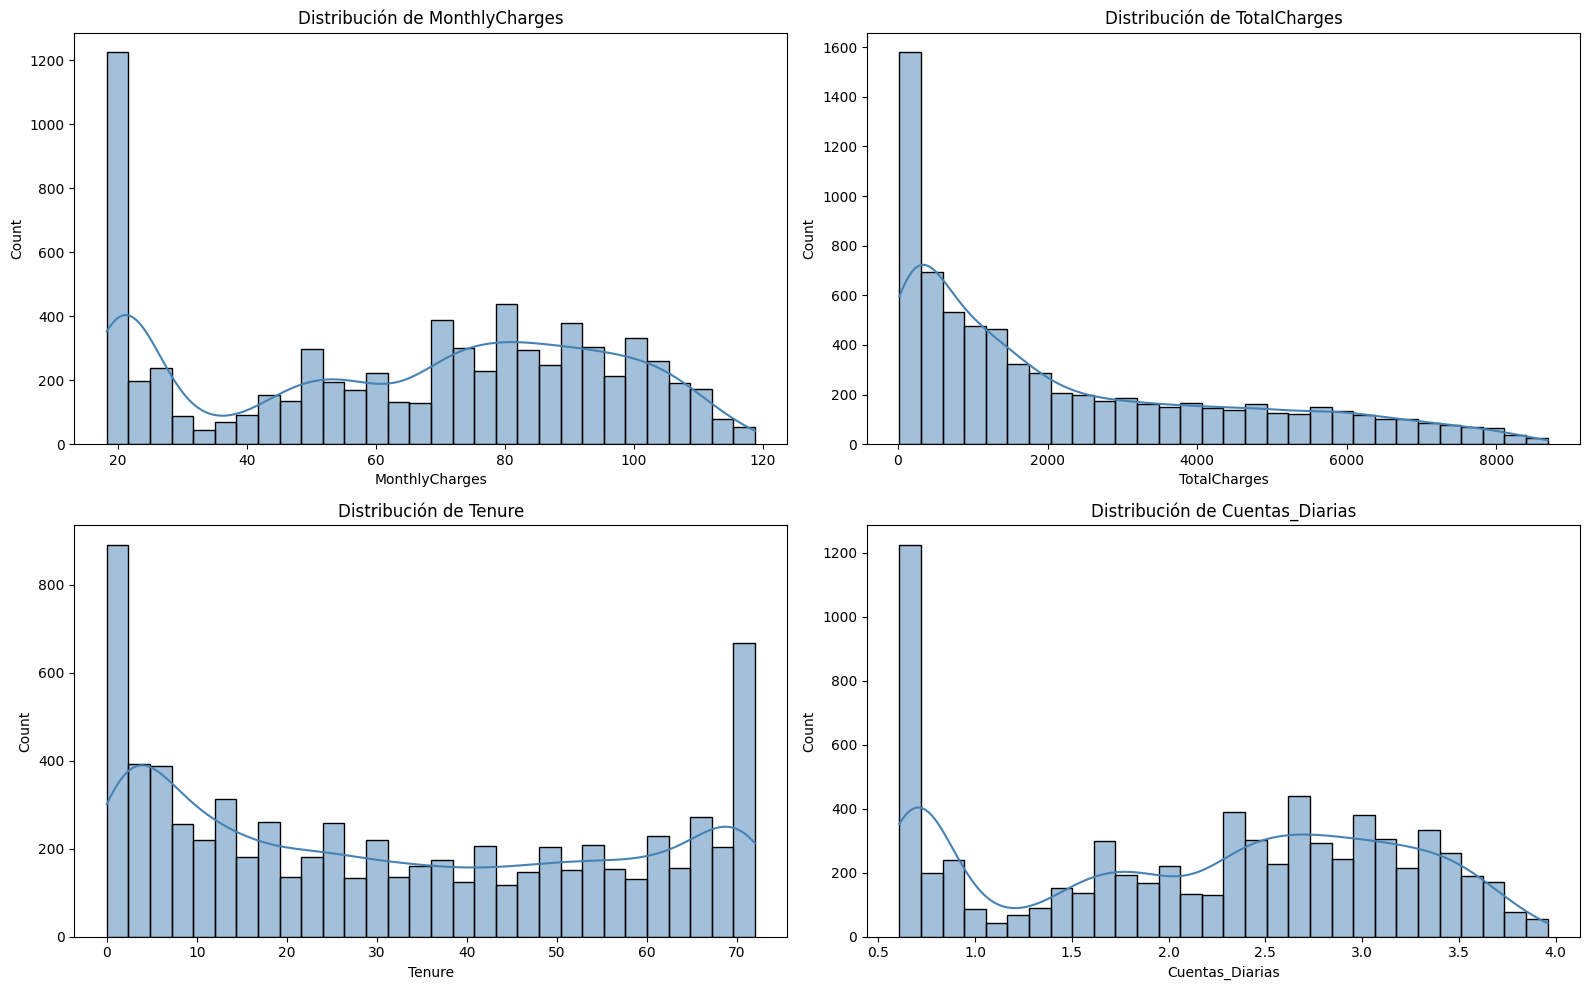

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_numericas = ['MonthlyCharges', 'TotalCharges', 'Tenure', 'Cuentas_Diarias']

plt.figure(figsize=(16, 10))
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_final[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

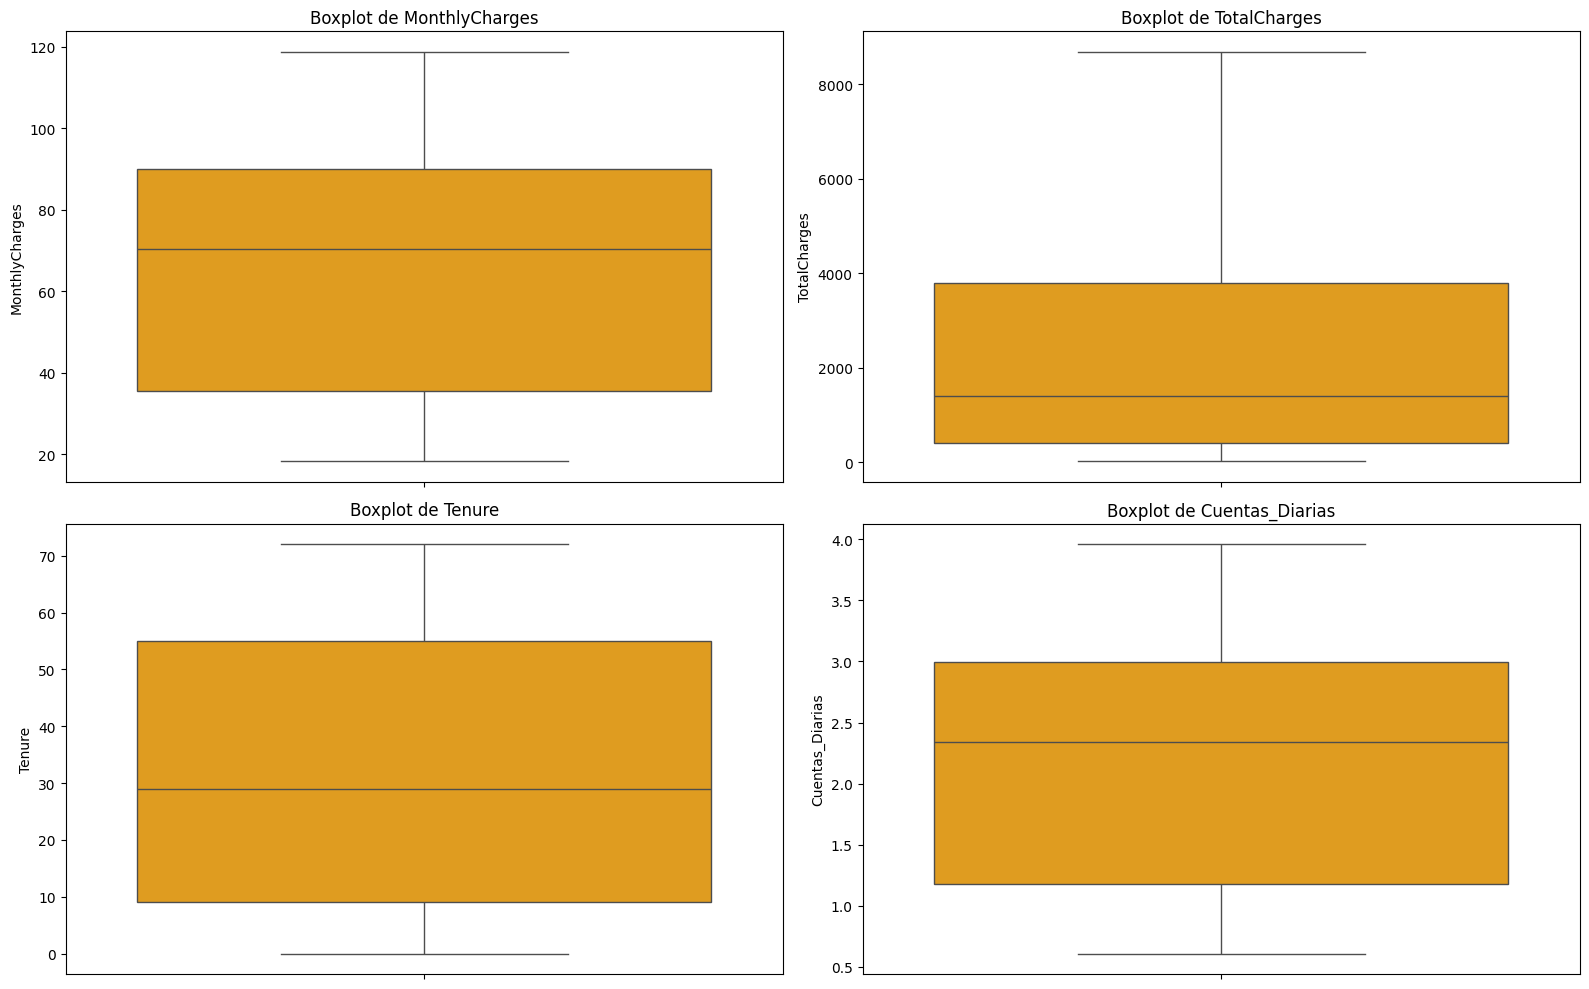

In [25]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(variables_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_final, y=col, color='orange')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

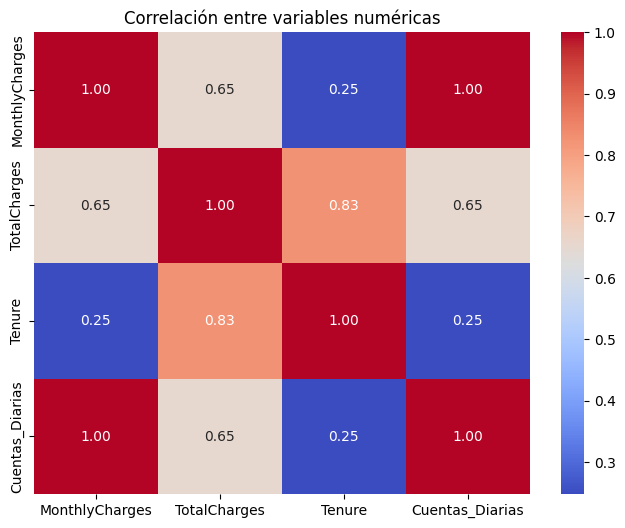

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_final[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.show()

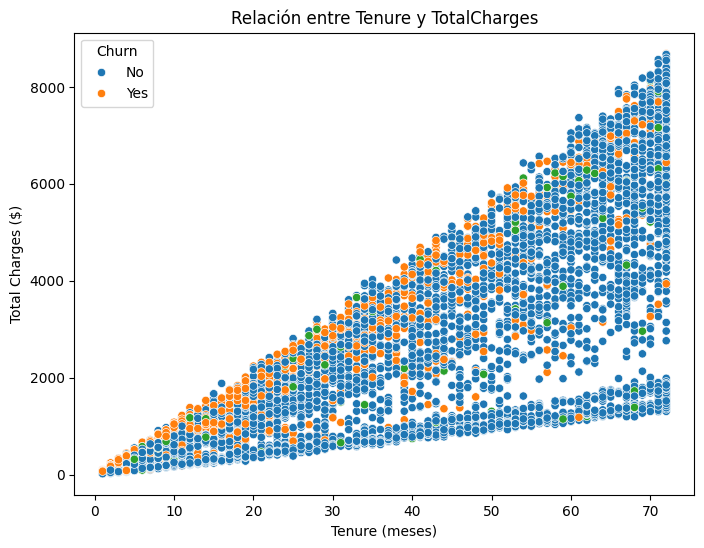

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final, x='Tenure', y='TotalCharges', hue='Churn')
plt.title('Relación entre Tenure y TotalCharges')
plt.xlabel('Tenure (meses)')
plt.ylabel('Total Charges ($)')
plt.legend(title='Churn')
plt.show()

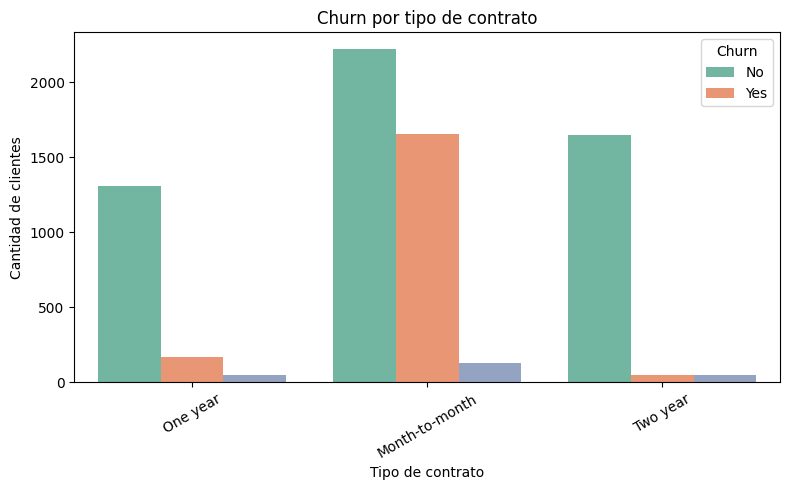

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_final, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#📄Informe final

In [29]:
# Resumen de Hallazgos Clave

# 1. Tenure (tiempo con la empresa):
# Los clientes que cancelan tienden a tener un tenure bajo (recién
# contratados).

# Los que permanecen han estado en promedio mucho más tiempo.

# ✅ Implicación: El riesgo de cancelación es más alto en los primeros 6 meses.

# 2. Total Charges (Total gastado):
# Clientes que cancelan han gastado mucho menos en total, lo cual concuerda con
# un tenure corto.

# La relación entre TotalCharges y Churn es muy marcada.

# ✅ Implicación: Es posible anticipar el churn con base en bajo total facturado + poco tiempo en la empresa.

# 3. Monthly Charges y Cuentas Diarias: Clientes que cancelan tienen en promedio
# cargos mensuales más altos que quienes se quedan.

# Esto indica que clientes nuevos con tarifas altas tienen mayor probabilidad de
# evadirse.

# ✅ Implicación: Hay una posible sensibilidad al precio entre clientes recientes.

# 4. Tipo de contrato:
# La mayoría de los que cancelan tienen contratos "Month-to-month".

# Contratos de 1 o 2 años están fuertemente asociados con retención.

# ✅ Implicación: Los contratos a largo plazo disminuyen la probabilidad de churn.

# 🎯 Recomendaciones para reducir la evasión
# Estrategia	Justificación
# 🔹 Programas de onboarding / retención en los primeros 3–6 meses
# Disminuye churn temprano, que es el más frecuente.
# 🔹 Ofertas o beneficios para clientes nuevos con cargos mensuales altos
# Ataca el grupo más vulnerable (nuevo + tarifa alta).
# 🔹 Incentivar contratos anuales con descuentos o beneficios extra Fomenta la
# permanencia y reduce churn espontáneo.
# 🔹 Seguimiento automático a clientes con bajo TotalCharges + alta tarifa
# mensual Segmento de alto riesgo fácilmente identificable.
# 🔹 Analizar feedback o quejas de los clientes que se van en el primer
# trimestre Puede haber causas ocultas como mal soporte o mala experiencia
# inicial.